<div style="padding: 20px;
  text-align: center;
  background: #cae7ed;
  color: #003049;
  font-size: 14px;">
  <h2><b>Inclass: Introduction to Machine Learning 2</b></h2>
  <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/0*tVCene42rgUTNv9Q.png" alt="drawing" width="150"/>
   <hr>
</div>

- Part 6 of Data Analytics Specialization
- Course length: 9 Hours
- Instructor: Rany Dwi Cahyaningtyas

*Managed and developed by Algoritma Products Team Division*

In [1]:
# library preparation
import pandas as pd

# pandas output display setup
pd.options.display.float_format = '{:,.2f}'.format

# Introduction

## Time Series & Forecasting

- **Time Series** merupakan data yang berhubungan dengan waktu yang memiliki interval waktu yang sama (memiliki periode pengambilan data sama). Contoh:
    - Data harga saham
    - Data kenaikan harga cabai
    - Pendapatan bulanan
    - Data curah hujan

- **Forecasting** merupakan **proses prediksi** untuk data time series berdasarkan pola data historiknya.

## Regression vs Time Series

| **Karakteristik** | **Regresi**                              | **Peramalan/Forecasting**                      |
|-------------------|------------------------------------------|------------------------------------|
| **Tujuan Utama**  | Menemukan hubungan antara variabel dependen dan independen.       | Meramalkan nilai masa depan berdasarkan data historis.        |
| **Variabel**      | Terdapat variabel dependen (Y) dan variabel independen (X1, X2, ...)          | Mungkin hanya satu variabel dependen (misalnya, penjualan)        |
| **Fungsi**        | Memprediksi nilai Y berdasarkan nilai-nilai X.          | Memprediksi nilai masa depan Y berdasarkan data masa lalu.     |
| **Hubungan**      | Menunjukkan hubungan linear atau  non-linear antara variabel.       | Fokus pada tren, musiman, dan faktor lain yang memengaruhi.     |

# Working with Time Series Data

**Time Series Workflow**

1. [Import Data](#0)
2. [Data Wrangling](#1)
3. [Exploratory Data Analyis](#2) 
4. [Modeling](#3)
5. [Model Interpretation](#4)
6. [Forecast Evaluation](#6)
7. [Model Tuning](#6)

## 1. Import Data <a id="0" ></a>

📍 **Dataset** : Data time series penjualan harian dari perusahaan perangkat lunak terbesar di Rusia bernama **1C Company** dari [Kaggle](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview)
> - Data mencakup beberapa tahun dan berisi tentang informasi penjualan harian berbagai produk perangkat lunak di berbagai toko

📍 **Bussiness Problem** : Memprediksi total penjualan untuk setiap produk disuatu toko di bulan selanjutnya

🎯 **Tujuan**: Membantu mengoptimalkan manajemen inventaris dan strategi penjualan

In [2]:
sales = pd.read_csv("data_input/sales_data.csv")

In [3]:
sales.head()

,date,date_block_num,shop_id,shop_name,item_id,item_price,item_cnt_day,total_revenue
0,02.01.2013,0,59,"Yaroslavl shopping center ""Altair""",22154,999.00,1.00,999.00
1,10.01.2013,0,59,"Yaroslavl shopping center ""Altair""",22151,399.00,1.00,399.00
2,04.01.2013,0,59,"Yaroslavl shopping center ""Altair""",5603,699.00,1.00,699.00
3,19.01.2013,0,59,"Yaroslavl shopping center ""Altair""",5587,199.00,2.00,398.00
4,31.01.2013,0,59,"Yaroslavl shopping center ""Altair""",5613,"5,571.00",1.00,"5,571.00"


Deskripsi data:
- Data terdiri dari 2,935,849 observasi baris dan 8 variabel atau kolom
- Glossary Data:
    + `date`: tanggal dengan format **dd.mm.yyyy**
    + `date_block_num`: urutan angka untuk bulan (Jan 2013 = 0, Feb 2013 = 1, ... Okt 2015 = 33)
    + `shop_id`: nomor identitas toko (0-59)
    + `ship_name`: nama toko
    + `item_id`: nomor identitas produk
    + `item_price`: harga barang di tanggal tersebut
    + `item_cnt_day`: jumlah barang terjual di tanggal tersebut
    + `total_revenue`: pendapatan kotor per hari (`item_cnt_day` * `item_price`)

## 2. Data Wrangling <a id="1" ></a>

🔎 Data time series merupakan data yang dikumpulkan pada interval **waktu yang teratur**. Dalam kasus ini kita ingin menganalisis tentang **total penjualan** perangkat lunak yang dikumpulkan **setiap hari**.

Beberapa hal yang wajib diperhatikan ketika melakukan analisis data time series yaitu:

- Konversi tipe kolom **date** ke `datetime64[ns]`
- Memastikan data terurut dengan baik (terlampau >> terbaru)
- Membuat data menjadi interval yang tetap (harian)

### Konversi tipe kolom **date** ke `datetime64[ns]`

Kolom yang akan masuk ke dalam pemodelan `prophet` harus bertipe data `datetime64[ns]`, oleh sebab itu wajib kita lakukan perubahan tipe data terlebih dahulu.

In [4]:
# cek tipe data sebelum konversi
sales.dtypes

date               object
date_block_num      int64
shop_id             int64
shop_name          object
item_id             int64
item_price        float64
item_cnt_day      float64
total_revenue     float64
dtype: object

Sebelum melakukan konversi tipe data, kita perlu memeriksa cara penulisan tanggal pada data kita terlebih dahulu, agar tidak terjadi kesalahan pada saat konversi (misal, bulan menjadi tanggal, atau sebaliknya).

In [5]:
# cek cara penulisan tanggal
sales.head(5)

,date,date_block_num,shop_id,shop_name,item_id,item_price,item_cnt_day,total_revenue
0,02.01.2013,0,59,"Yaroslavl shopping center ""Altair""",22154,999.00,1.00,999.00
1,10.01.2013,0,59,"Yaroslavl shopping center ""Altair""",22151,399.00,1.00,399.00
2,04.01.2013,0,59,"Yaroslavl shopping center ""Altair""",5603,699.00,1.00,699.00
3,19.01.2013,0,59,"Yaroslavl shopping center ""Altair""",5587,199.00,2.00,398.00
4,31.01.2013,0,59,"Yaroslavl shopping center ""Altair""",5613,"5,571.00",1.00,"5,571.00"


> Format: DD.MM.YYYY

Jika kita sudah yakin, maka kita dapat melakukan konversi tipe data ke `datetime64[ns]`

In [6]:
# to datetime
sales['date'] = pd.to_datetime(sales['date'], dayfirst = True) # bisa gunakan parameter format

In [7]:
# cek tipe data setelah konversi
sales.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
shop_name                 object
item_id                    int64
item_price               float64
item_cnt_day             float64
total_revenue            float64
dtype: object

### Memastikan data terurut dengan baik

Salah satu syarat dalam membuat model Time Series adalah data tanggal harus terurut dengan baik dari data **paling lampau** sampai dengan data **paling baru**.

Untuk mengurutkan data, kita dapat menggunakan method `.sort_values()`

In [8]:
# Sort the data ascending by date column
sales = sales.sort_values(by = 'date')
sales.head()

,date,date_block_num,shop_id,shop_name,item_id,item_price,item_cnt_day,total_revenue
2074750,2013-01-01,0,42,"St. Petersburg TC ""Nevsky Center""",22134,397.92,1.00,397.92
289070,2013-01-01,0,19,"Kursk shopping center ""Pushkinsky""",16333,599.00,1.00,599.00
1811351,2013-01-01,0,54,"Khimki Shopping Center ""Mega""",4327,449.00,1.00,449.00
1811348,2013-01-01,0,54,"Khimki Shopping Center ""Mega""",4323,399.00,1.00,399.00
289086,2013-01-01,0,19,"Kursk shopping center ""Pushkinsky""",15585,149.00,1.00,149.00


In [9]:
sales.tail()

,date,date_block_num,shop_id,shop_name,item_id,item_price,item_cnt_day,total_revenue
2616783,2015-10-31,33,5,"Vologda SEC ""Marmalade""",20949,5.00,2.00,10.00
351855,2015-10-31,33,19,"Kursk shopping center ""Pushkinsky""",1583,"3,999.00",2.00,"7,998.00"
351858,2015-10-31,33,19,"Kursk shopping center ""Pushkinsky""",1523,799.00,1.00,799.00
351780,2015-10-31,33,19,"Kursk shopping center ""Pushkinsky""",10202,"1,199.00",1.00,"1,199.00"
1090149,2015-10-31,33,7,"Voronezh TRC ""Maksimir""",5233,"1,199.00",1.00,"1,199.00"


Setelah tanggal sudah terurut, kita dapat melihat range tanggal pada data kita.
- Penjualan paling awal: 1 Januari 2013
- Penjualan paling akhir: 31 Oktober 2015

Berapa banyak data yang optimal?
- Harian -> Pola tahunan -> minimal 2 periode perulangan data -> 2 tahun
- Covid-19 -> after covid tahun 22-24

### Membuat data menjadi interval yang tetap

Hal yang penting dari sebuah data time series adalah memiliki **interval waktu yang tetap**, seperti interval harian, mingguan ataupun bulanan. Tidak boleh ada data yang **berulang pada tanggal yang sama**.

Pada data di atas, terdapat beberapa observasi dalam satu hari untuk toko yang sama, karena satu toko dapat menjual beberapa produk *software* yang berbeda dalam satu hari. Oleh karena itu, data kita masih dalam interval yang tidak tetap. 

🎯 Kita akan melakukan agregasi untuk menghitung jumlah penjualan (`item_cnt_day`) dan total pendapatan (`total_revenue`) untuk tiap tanggal `date` di masing-masing toko `shop_id`.

❗️ Ubah data tersebut menjadi data yang diinginkan


|     date    | shop_id | total_qty | total_revenue |
|:-----------:|:-------:|:---------:|:-------------:|
|  2013-01-01 |   2    |   24.00   | 31,886.00      |
|  2013-01-01 |   7    |   89.00   | 59,993.00      |
|  2013-01-01 |   8    |   50.00   | 44,516.00      |
|  2013-01-01 |   13   |   31.00   | 6,043.00       |
|  2013-01-01 |   14   |   66.00   | 48,847.00      |

In [10]:
#sales.groupby(['date', 'shop_id']).sum()[['item_cnt_day', 'total_revenue']].reset_index()

In [11]:
# menghitung jumlah item & revenue per hari untuk tiap toko
daily_sales = sales.groupby(['date', 'shop_id']).sum()[['item_cnt_day', 'total_revenue']].reset_index()

# mengubah nama kolom
daily_sales = daily_sales.rename(columns = {'item_cnt_day': 'total_qty'})

daily_sales.head()

,date,shop_id,total_qty,total_revenue
0,2013-01-01,2,24.00,"31,886.00"
1,2013-01-01,7,89.00,"59,993.00"
2,2013-01-01,8,50.00,"44,516.00"
3,2013-01-01,13,31.00,"6,043.00"
4,2013-01-01,14,66.00,"48,847.00"


Catatan: 
- Data time series tidak boleh ada perulangan data.
- Harus diagregasi dulu -> crosstab, pivot, groupby
- Untuk formula aggregate function -> disesuaikan dengan kebutuhan bisnis. Lebih cocok pake sum, mean, median. 

Tiap toko akan memiliki data dengan tanggal yang berurutan dan tidak berulang. Untuk memastikan agregasi kita sudah benar, pastikan untuk `shop_id == 2`

In [12]:
daily_sales[daily_sales['shop_id'] == 2]

,date,shop_id,total_qty,total_revenue
0,2013-01-01,2,24.00,"31,886.00"
17,2013-01-02,2,76.00,"75,023.80"
60,2013-01-03,2,96.00,"110,521.00"
105,2013-01-04,2,80.00,"62,854.00"
149,2013-01-05,2,72.00,"50,181.00"
...,...,...,...,...
47019,2015-10-27,2,7.00,"7,822.00"
47061,2015-10-28,2,23.00,"18,238.00"
47103,2015-10-29,2,19.00,"40,685.00"
47145,2015-10-30,2,19.00,"49,861.00"


[✨ QUICK SUMMARY: DATA WRANGLING ✨]

Beberapa hal yang harus diperhatikan sebelum melakukan analisis data time series yaitu:
- Konversi tipe kolom date ke datetime64[ns]
- Memastikan data terurut dengan baik (terlampau ke terbaru),  kita dapat menggunakan method .sort_values()
- Memastikan data berada dalam interval yang tetap (harian/mingguan/bulanan/dsb..)

## 3. Exploratory Data Analysis <a id="2"></a>

**❓ Task 1** Sebagai sebuah perusahaan software terbesar di Rusia, 1C Company menjual produknya ke berbagai toko. Ada berapa jumlah toko yang menjual software buatan 1C?

In [13]:
# code here
daily_sales['shop_id'].nunique()

60

In [14]:
sales['shop_name'].nunique()

60

📝 **Insight**: 60 toko yang ada pada 1c company

**❓ Task 2** Dari toko-toko tersebut, manakah Top 3 `shop_id` dengan `total_qty` terbanyak?

In [15]:
daily_sales.head()

,date,shop_id,total_qty,total_revenue
0,2013-01-01,2,24.00,"31,886.00"
1,2013-01-01,7,89.00,"59,993.00"
2,2013-01-01,8,50.00,"44,516.00"
3,2013-01-01,13,31.00,"6,043.00"
4,2013-01-01,14,66.00,"48,847.00"


In [16]:
# code here
daily_sales[['shop_id', 'total_qty']].groupby('shop_id').sum()

,total_qty
shop_id,
0,"11,705.00"
1,"6,311.00"
2,"30,620.00"
3,"28,355.00"
4,"43,942.00"
5,"42,762.00"
6,"100,489.00"
7,"67,058.00"
8,"3,595.00"


In [17]:
# daily_sales.groupby('shop_id').sum()[['shop_id', 'total_qty']] -> error datetime tidak mau di sum

Added Knowledge: OOP (Object Oriented Programming)
- Bisa di chaining sampai banyak method

In [18]:
# sort_values()
daily_sales[['shop_id', 'total_qty']].groupby('shop_id').sum().sort_values('total_qty', ascending = False).head(3)

,total_qty
shop_id,
31,"310,777.00"
25,"241,920.00"
54,"185,790.00"


📝 **Insight**: Dari hasil analisis kita di atas, terlihat **toko 31, 25, dan 54** adalah 3 toko dengan penjualan produk terbanyak.

**❓ Task 3** Kita akan berfokus kepada 3 toko ini saja. Buat dataframe baru bernama `top_3` yang berisi 3 toko tadi saja!

In [19]:
# membuat syarat untuk conditional subseting
conditions = (daily_sales['shop_id'] == 31) | (daily_sales['shop_id'] == 25) | (daily_sales['shop_id'] == 54)

# filtering
top_3 = daily_sales[conditions]
top_3

,date,shop_id,total_qty,total_revenue
16,2013-01-01,54,415.00,"316,557.00"
34,2013-01-02,25,568.00,"345,174.13"
40,2013-01-02,31,568.00,"396,376.10"
55,2013-01-02,54,709.00,"519,336.00"
78,2013-01-03,25,375.00,"249,421.00"
...,...,...,...,...
47122,2015-10-29,31,152.00,"103,456.00"
47161,2015-10-30,25,275.00,"297,992.00"
47164,2015-10-30,31,267.00,"204,317.00"
47202,2015-10-31,25,287.00,"263,524.00"


### Visualization: Multiple vs Multivariate Time Series

Sebelum kita masuk ke tahapan pembuatan model, kita perlu melakukan analisis berdasarkan visualisasi datanya. Pada bagian ini kita akan menggunakan library **`matplotlib` dan `seaborn`**.

📌 Informasi tambahan tentang perbedaan *multiple* dengan *multivariate* pada kasus time series, berikut adalah definisi dari keduanya:

| **Karakteristik**                   | **Data Time Series Multiple**                 | **Data Time Series Multivariate**         |
|-------------------------------------|----------------------------------------------|------------------------------------------|
| **Definisi**                        | Terdapat **satu variabel** dari **banyak objek** yang ditinjau dari waktu ke waktu.       | Terdapat **banyak variabel** dari hanya **satu objek** yang ditinjau dari waktu ke waktu |
| **Tujuan**                          | Membandingkan pola dan tren beberapa object dari seri waktu. | Memahami hubungan antara variabel-variabel yang berubah seiring waktu dan mengidentifikasi interaksi antara variabel-variabel tersebut. |

In [20]:
# data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#### Multiple Time Series

Pada kasus kita, multiple time series adalah ketika kita meninjau fluktuasi dari variabel `total_qty` pada **tiga toko** terpopuler.

In [21]:
top_3.head()

,date,shop_id,total_qty,total_revenue
16,2013-01-01,54,415.00,"316,557.00"
34,2013-01-02,25,568.00,"345,174.13"
40,2013-01-02,31,568.00,"396,376.10"
55,2013-01-02,54,709.00,"519,336.00"
78,2013-01-03,25,375.00,"249,421.00"


In [22]:
multiple = top_3.pivot_table(index='date', # Kolom date
                                   columns='shop_id', # Dipisah berdasarkan kode toko
                                   values='total_qty', # Total produk terjual
                                   aggfunc='sum')
multiple.head()

shop_id,25,31,54
date,,,
2013-01-01,NaN,NaN,415.00
2013-01-02,568.00,568.00,709.00
2013-01-03,375.00,423.00,586.00
2013-01-04,377.00,431.00,495.00
2013-01-05,315.00,415.00,495.00


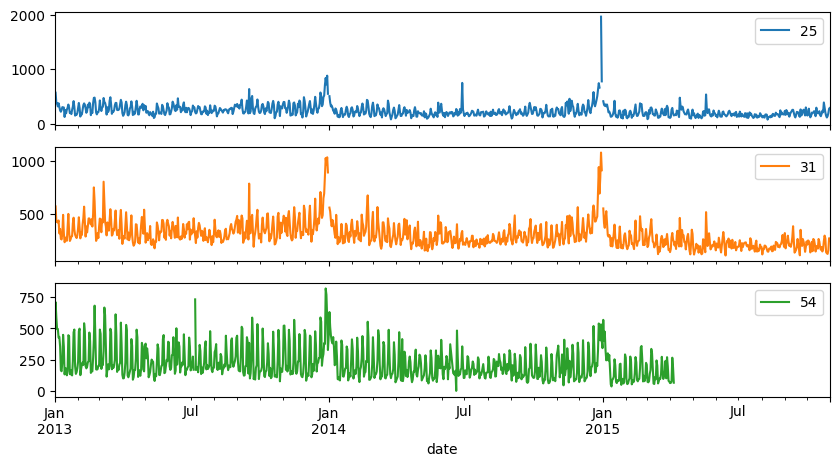

In [23]:
multiple.plot(subplots=True, figsize=(10, 5));


📈 Dengan melihat visualisasi tersebut kita mendapatkan:

**1. Bagaimana pola penjualannya?**
> - Januari / New Year peak sales
> - Toko 54 gaada penjualan lagi dari bulan mei 2015 

**2. Bagaimana tren tiap toko?**
> Cenderung menurun

**3. Bagaimana fluktuasinya?**
> standar deviasi -> semakin besar maka  semakin berfluktuasi -> 54


In [24]:
multiple.describe()

shop_id,25,31,54
count,"1,030.00","1,031.00",826.00
mean,234.87,301.43,224.93
std,114.38,122.04,130.62
min,73.00,102.00,-1.00
25%,165.00,221.50,128.00
50%,208.00,275.00,186.50
75%,285.00,358.50,288.00
max,"1,966.00","1,080.00",818.00


#### Multivariate Time Series

Pada kasus kita, multivariate time series adalah ketika kita meninjau pergerakan dari `total_qty` dan `total_revenue` dari toko 31 saja. Kita akan melakukan conditional subsetting dari data `daily_sales` untuk membuat `daily_sales_31`.

In [25]:
daily_sales_31 = top_3[top_3['shop_id'] == 31].reset_index(drop=True)

In [26]:
daily_sales_31

,date,shop_id,total_qty,total_revenue
0,2013-01-02,31,568.00,"396,376.10"
1,2013-01-03,31,423.00,"276,933.11"
2,2013-01-04,31,431.00,"286,408.00"
3,2013-01-05,31,415.00,"273,245.00"
4,2013-01-06,31,435.00,"260,775.00"
...,...,...,...,...
1026,2015-10-27,31,123.00,"111,851.00"
1027,2015-10-28,31,117.00,"180,557.00"
1028,2015-10-29,31,152.00,"103,456.00"
1029,2015-10-30,31,267.00,"204,317.00"


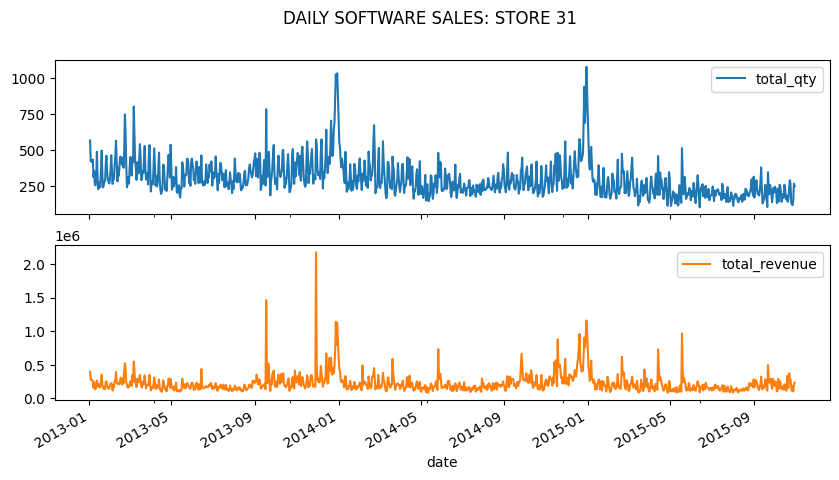

In [27]:
daily_sales_31.set_index('date')[['total_qty', 'total_revenue']].plot(subplots=True,figsize=(10, 5))
plt.suptitle('DAILY SOFTWARE SALES: STORE 31')
plt.show()

📈 Dengan melihat visualisasi tersebut kita mendapatkan:

**1. Bagaimana fluktuasinya?**
>  ......

**2. Bagaimana hubungan antar variabelnya??**
> untuk total_qty ada hubungan dengan total_revenue. Dalam suatu waktu pembelian banyak (qty) akan menghasilkan revenue yang juga banyak



**[✨ QUICK SUMMARY: MULTIVARIATE & MULTIPLE ✨]**

Sebelum kita masuk ke tahapan pembuatan model, kita perlu melakukan analisis dengan melakukan visualisasi data. Kita dapat melakukan multiple time series ataupun multivariate time series analysis. 
- Multiple time series: Terdapat satu variabel dari banyak objek yang ditinjau dari waktu ke waktu.
- Multivariate time series: Terdapat banyak variabel dari hanya satu objek yang ditinjau dari waktu ke waktu. Biasanya untuk kondisi ini variabelnya saling berkaitan satu sama lain.

--- END OF DAY 1 ---

---

--- START OF DAY 2 ---

## 4. Modelling using [`prophet`](https://facebook.github.io/prophet/) <a id="3"></a>

Konsep dasar dalam pemahaman kasus time series adalah dengan melakukan pemecahan komponen dari data time series (***decompose***). *Decompose* time series memiliki banyak macam dan algoritma yang dapat digunakan. Konsep yang digunakan oleh `Prophet` dalam melakukan decompose adalah metode **Generative Additive Model (GAM)**

**General Additive Model (GAM)**

> Salah satu kemajuan terbaru dalam pemodelan data time series yang memandang time series sebagai hasil penjumlahan dari komponennya: 
>> $Y(t) = T(t) + S(t) + E(t)$
> - **Trend (T)**: Pergerakan jangka panjang dalam nilai rata-ratanya.
> - **Seasonality (S)**: Efek musiman berulang.
> - **Residuals (E)**: Komponen tak teratur atau fluktuasi acak yang tidak dijelaskan oleh tren dan musiman.

**`prophet`**
> - Dikembangkan oleh facebook untuk membuat pemodelan data time series lebih mudah diakses oleh non ekspert.
> - Pendekatan yang sederhana sehingga mudah dipahami dan cocok untuk pemula
> - `prophet` memanfaatkan GAM yang menambahkan efek hari libur untuk memodelkan jadwal yang tidak teratur.

<div class="alert">

📍 **Business Problem** :  Melakukan prediksi penjualan harian untuk toko 31.

📍 **Tujuan**: Membantu mengoptimalkan manajemen inventaris dan strategi penjualan.

📍 **Data**: Kita akan menggunakan data penjualan harian untuk toko 31. Toko ini cocok digunakan karena memiliki :

1. Relevansi bisnis: sebagai toko dengan penjualan tertinggi.
2. Sederhana dan terfokus: Meminimalkan kompleksitas model dan memudahkan pengembangan strategi forecasting yang dapat diimplementasikan dengan mudah.
3. Ketersediaan data: toko 31 memiliki data yang lebih lengkap dan konsisten per hari dibandingkan toko lain.

Catatan: Perlu diingat bahwa pemilihan toko ini dapat disesuaikan jika terdapat kebutuhan bisnis spesifik yang memerlukan analisis pada toko lain.

</div>

### **Data Preparation**

Untuk menggunakan `prophet`, kita perlu mempersiapkan data time series ke dalam format yang spesifik sesuai kebutuhan library ini. 

<div class="alert">

- Data frame harus terdiri dari 2 kolom dengan nama sebagai berikut:
    + `ds`: kolom penanda waktu, harus bertipe `datetime64`
    + `y`: nilai yang ingin diprediksi

</div>

🔻 Pada contoh di bawah kita akan menggunakan `total_qty` pada toko 31 sebagai nilai yang ingin kita forecast.

In [28]:
daily_sales_31.head()

,date,shop_id,total_qty,total_revenue
0,2013-01-02,31,568.00,"396,376.10"
1,2013-01-03,31,423.00,"276,933.11"
2,2013-01-04,31,431.00,"286,408.00"
3,2013-01-05,31,415.00,"273,245.00"
4,2013-01-06,31,435.00,"260,775.00"


In [29]:
# hanya mengambil kolom date & total_qty
daily_total_qty = daily_sales_31[['date', 'total_qty']]

# mengganti nama kolom menjadi ds & y
daily_total_qty = daily_total_qty.rename(
    columns = {'date' : 'ds',
               'total_qty' : 'y'})

daily_total_qty.head()

,ds,y
0,2013-01-02,568.00
1,2013-01-03,423.00
2,2013-01-04,431.00
3,2013-01-05,415.00
4,2013-01-06,435.00


### **Fitting Model**

🔻 Setelah semua persiapan data selesai. Kini kita tugaskan `prophet` untuk mencari pola dari data time series kita. Adapun langkah pembuatan model, yaitu:

![](assets/fit-model.jpg)

In [30]:
# load library
from prophet import Prophet

🔻Inisiasi object model menggunakan fungsi `Prophet()`

In [31]:
model_31 = Prophet()

🔻 Fitting data `daily_total_qty` menggunakan method `fit()`

In [32]:
# melakukan fitting / training
model_31.fit(daily_total_qty)

18:40:53 - cmdstanpy - INFO - Chain [1] start processing
18:40:53 - cmdstanpy - INFO - Chain [1] done processing


### **Forecast Model**

Berikut untuk tahapan pada saat melakukan forecasting model Prophet:

![](assets/forecast-model.jpg)


🔻 **Menentukan Periode Forecasting**

> Dalam kasus ini, kita melakukan forecasting selama **1 tahun kedepan**

❗️ Membuat dataframe masa depan menggunakan method `make_future_dataframe()` dari objek model kita yaitu `model_31` dan tentukan parameter:

- `periods` = banyaknya data yang akan kita forecast
- `freq` = format data/frequency. `D` (day), `M` (month), dll

In [33]:
daily_total_qty.head()

,ds,y
0,2013-01-02,568.00
1,2013-01-03,423.00
2,2013-01-04,431.00
3,2013-01-05,415.00
4,2013-01-06,435.00


In [34]:
# dataframe baru berisikan data waktu lama disertai data waktu baru
future_31 = model_31.make_future_dataframe(periods= 365, freq = 'D')                                        

In [35]:
future_31

,ds
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-05
4,2013-01-06
...,...
1391,2016-10-26
1392,2016-10-27
1393,2016-10-28
1394,2016-10-29


🔻 Prediksi data

Kita akan menggunakan dataframe `future_31` ini untuk melakukan forecasting menggunakan method `.predict()`.

In [36]:
forecast_31 = model_31.predict(future_31)
forecast_31.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,376.80,485.70,668.18,376.80,376.80,201.43,201.43,201.43,-32.84,-32.84,-32.84,234.27,234.27,234.27,0.00,0.00,0.00,578.24
1,2013-01-03,376.73,470.38,657.46,376.73,376.73,188.67,188.67,188.67,-26.06,-26.06,-26.06,214.73,214.73,214.73,0.00,0.00,0.00,565.40
2,2013-01-04,376.65,530.30,708.57,376.65,376.65,249.26,249.26,249.26,55.64,55.64,55.64,193.62,193.62,193.62,0.00,0.00,0.00,625.90
3,2013-01-05,376.57,535.58,723.57,376.57,376.57,253.27,253.27,253.27,82.01,82.01,82.01,171.26,171.26,171.26,0.00,0.00,0.00,629.84
4,2013-01-06,376.49,433.81,612.10,376.49,376.49,145.58,145.58,145.58,-2.45,-2.45,-2.45,148.03,148.03,148.03,0.00,0.00,0.00,522.07


Dari berbagai nilai di atas kita akan mengambil beberapa informasi saja, yaitu:
- `ds`: Tanggal
- `trend`: Nilai trend
- `weekly`: Nilai seasonal mingguan
- `yearly`: Nilai seasonal tahunan
- `yhat`: Nilai prediksi

<details>
    <summary>🔻 Detail deskripsi setiap kolom hasil predict </summary>
    
- `yhat_lower`: batas bawah dari nilai prediksi
- `yhat_upper`: batas atas dari nilai prediksi

- `trend_lower`: batas bawah dari tren
- `trend_upper`: batas atas dari tren

- `weekly_lower`: batas bawah dari komponen mingguan dari nilai prediksi
- `weekly_upper`: batas atas dari komponen mingguan dari nilai prediksi


- `yearly_lower`: batas bawah dari komponen tahunan dari nilai prediksi
- `yearly_upper`: batas atas dari komponen tahunan dari nilai prediksi

- `additive_terms`: komponen tambahan dari nilai prediksi
- `additive_terms_lower`: batas bawah dari komponen tambahan dari nilai prediksi
- `additive_terms_upper`: batas atas dari komponen tambahan dari nilai prediksi

- `multiplicative_terms`: komponen perkalian dari nilai prediksi
- `multiplicative_terms_lower`: batas bawah dari komponen perkalian dari nilai prediksi
- `multiplicative_terms_upper`: batas atas dari komponen perkalian dari nilai prediksi
    
</details>

In [37]:
forecast_31[['ds', 'trend', 'weekly', 'yearly', 'yhat']]

,ds,trend,weekly,yearly,yhat
0,2013-01-02,376.80,-32.84,234.27,578.24
1,2013-01-03,376.73,-26.06,214.73,565.40
2,2013-01-04,376.65,55.64,193.62,625.90
3,2013-01-05,376.57,82.01,171.26,629.84
4,2013-01-06,376.49,-2.45,148.03,522.07
...,...,...,...,...,...
1391,2016-10-26,151.47,-32.84,-32.28,86.36
1392,2016-10-27,151.29,-26.06,-30.33,94.89
1393,2016-10-28,151.10,55.64,-27.46,179.28
1394,2016-10-29,150.92,82.01,-23.68,209.25


<div class="alert alert-danger"><center>
  <details>
      <summary><b>💬 Ingat Kembali: Konsep GAM </b></summary>GAM merupakan model yang bersifat aditif, yang berarti <br> menjelaskan data time series sebagai hasil penjumlahan dari beberapa komponen.
</div> 

💬 Pada kasus data kita, model kita telah mengekstrak 3 tipe komponen: `trend`, `weekly` seasonaliti, dan `yearly` seasonaliti. Oleh sebab itu, formulanya menjadi

$yhat(t) = T(t) + S_{weekly}(t) + S_{yearly}(t)$

❗️ Pembuktian bahwa `forecast_31` memuat fungsi berikut `yhat` = `trend` + `weekly` + `yearly`.

In [38]:
# penjumlahan manual
(forecast_31['trend'] + forecast_31['weekly'] + forecast_31['yearly']).head()

0   578.24
1   565.40
2   625.90
3   629.84
4   522.07
dtype: float64

In [39]:
# sama dengan nilai yhat
(forecast_31['yhat']).head()

0   578.24
1   565.40
2   625.90
3   629.84
4   522.07
Name: yhat, dtype: float64

[✨ QUICK SUMMARY: PROPHET ✨]

• 📈 Menggunakan metode General/Generative **Additive** Model.

• 📅 Aturan persiapan data: kolom tanggal adalah **ds**, dan kolom variabel yang di-forecast adalah **y**.

• 🛠️ Membuat model Prophet: buat **objeknya**, lakukan `.fit()` dengan dataframenya.

• 🔮 Melakukan forecasting: buat dataframe untuk waktu di masa depan dengan `.make_future_dataframe()`, lalu gunakan .`predict()`.

### **Visualisasi**

Setelah membuat model dan melakukan forecast, kita akan melakukan visualisasi dari `model_31` dengan method `.plot()` yang diisi dengan hasil forecast-nya (`forecast_31`). 

Hasil plot akan menampilkan data asli berupa titik-titik hitam dan hasil model fitted serta forecast dengan garis biru.

c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


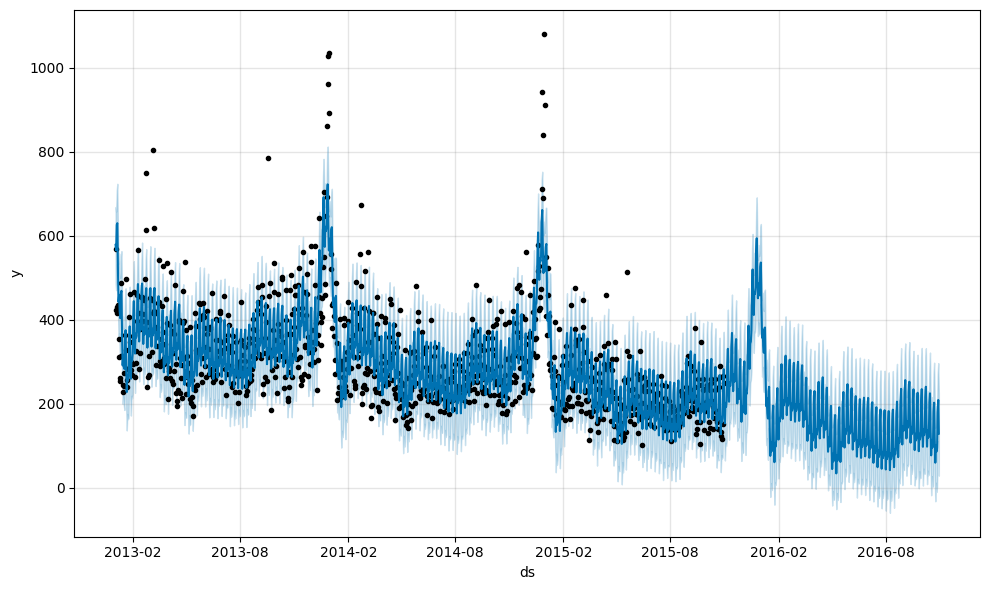

In [40]:
# your code here
fig = model_31.plot(forecast_31)

**Keterangan Gambar**
- Titik hitam: Observasi asli dari data kita (y)
- Garis berwarna biru gelap: Hasil prediksi (yhat)
- Garis berwarna biru muda: interval prediksi - lower dan upper / batas bawah dan batas atas

In [41]:
# hasil forecast untuk tahun 2016
forecast_31.tail(304)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1092,2016-01-01,206.72,433.22,620.10,206.43,206.96,319.34,319.34,319.34,55.64,55.64,55.64,263.70,263.70,263.70,0.00,0.00,0.00,526.06
1093,2016-01-02,206.53,438.61,627.91,206.24,206.78,329.69,329.69,329.69,82.01,82.01,82.01,247.69,247.69,247.69,0.00,0.00,0.00,536.23
1094,2016-01-03,206.35,344.15,529.53,206.05,206.60,227.10,227.10,227.10,-2.45,-2.45,-2.45,229.55,229.55,229.55,0.00,0.00,0.00,433.45
1095,2016-01-04,206.16,265.08,446.84,205.86,206.42,151.29,151.29,151.29,-58.30,-58.30,-58.30,209.59,209.59,209.59,0.00,0.00,0.00,357.45
1096,2016-01-05,205.98,287.72,464.41,205.66,206.24,170.14,170.14,170.14,-17.99,-17.99,-17.99,188.13,188.13,188.13,0.00,0.00,0.00,376.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,2016-10-26,151.47,-9.53,179.77,147.05,155.77,-65.11,-65.11,-65.11,-32.84,-32.84,-32.84,-32.28,-32.28,-32.28,0.00,0.00,0.00,86.36
1392,2016-10-27,151.29,2.73,189.04,146.85,155.60,-56.39,-56.39,-56.39,-26.06,-26.06,-26.06,-30.33,-30.33,-30.33,0.00,0.00,0.00,94.89
1393,2016-10-28,151.10,88.33,270.70,146.64,155.43,28.18,28.18,28.18,55.64,55.64,55.64,-27.46,-27.46,-27.46,0.00,0.00,0.00,179.28
1394,2016-10-29,150.92,111.33,296.90,146.44,155.26,58.33,58.33,58.33,82.01,82.01,82.01,-23.68,-23.68,-23.68,0.00,0.00,0.00,209.25


## 5. Model Interpretation <a id="4" ></a>

Model time series yang kita buat selain untuk dapat digunakan untuk meramalkan kejadian di masa depan juga dapat digunakan sebagai penarikan insight terhadap data historis.

Dalam melakukan interpretasi, kita dapat melihat komponen time series dengan menggunakan fungsi `.plot_components()` dari objek `model_31`

c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

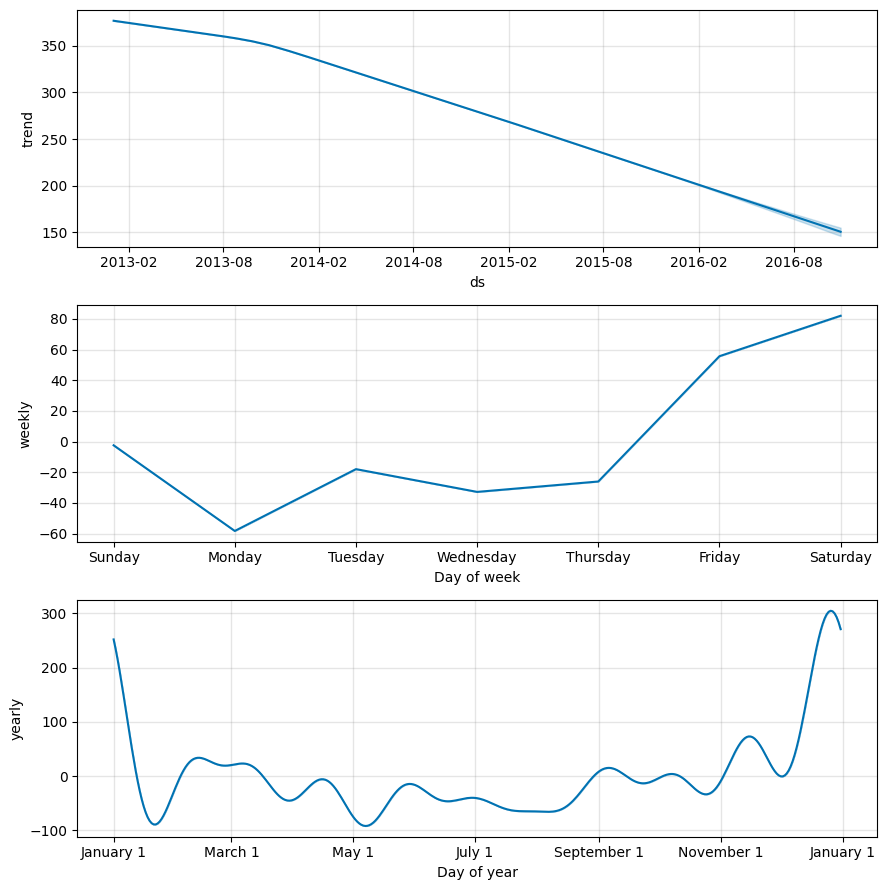

In [42]:
# your code here
model_31.plot_components(forecast_31);

🔻 Komponen:

- **Trend:** Pergerakan jangka panjang dari data kita.

- **Seasonal:** Pola berulang dalam periode tertentu (musiman)
    - weekly: pola berulang mingguan
    - yearly:pola berulang tahunan

❓ Insight apa saja yang dapat kita ambil dari visualisasi di atas?

- **TREND COMPONENT**
    - trendnya menurun dari waktu ke waktu

- **WEEKLY SEASONALITY**
    - Penjualan tertinggi ada di hari sabtu / weekend
    - Penjualan terendah di hari senin

- **YEARLY SEASONALITY**
    - penjualan cenderung lebih tinggi di waktu akhir tahun mendekati awal tahun

## 6. Time Series Component

| **Komponen** | **Penerapan Bisnis**                                                                                                                                                 |
|--------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Trend**        | Bisnis dapat merencanakan pertumbuhan jangka panjang  dan mengidentifikasi perubahan pasar                                                                           |
| **Seasonality**  | Dengan memahami musiman, bisnis dapat menyesuaikan strategi pemasaran,  persediaan, dan penawaran khusus untuk mengikuti pola musiman.                               |
| **Holiday**      | Dengan memahami efek liburan, bisnis dapat merencanakan  persiapan khusus untuk menghadapi lonjakan permintaan atau  menawarkan promosi yang relevan selama liburan. |

### Trend Component

Trend adalah pergerakan data secara general dalam jangka panjang. `Prophet` menggunakan **linear regression** untuk mendapatkan trend yang dapat digambarkan sebagai berikut:

![](assets/trend.png)

📖 Further reading for [math behind trend in `prophet`](https://github.com/ranydwi/prophet_trend/blob/main/math_behind_trend.ipynb)

Dari visualisasi di atas kita dapat melihat komponen trend data penjualan dari waktu ke waktu untuk shop_id 31. Kita dapat mengamati apakah trend tersebut meningkat, menurun, atau tetap.

#### Automatic Changepoint Detection

<div class="alert alert-success">
Kelebihan dari `Prophet` yaitu dengan adanya <b>changepoint detection</b> yang bisa mendeteksi otomatis adanya perubahan signifikan pada trend. 
</div> 

`Prophet` akan membagi data kita pada beberapa titik dan menghitung trend per bagian secara terpisah.

🔎 **Default Setting**
> - `n_changepoints=25`: 25 jumlah changepoint
> - `changepoint_range=0.8`: 80% data awal tempat changepoints berada

> Ini berarti Prophet akan mencari hingga 25 changepoints yang mungkin dalam 80% awal data untuk membantu mengidentifikasi di mana tren mungkin berubah.

Changepoint dapat divisualisasikan dengan menggunakan fungsi `add_changepoints_to_plot()`.

c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


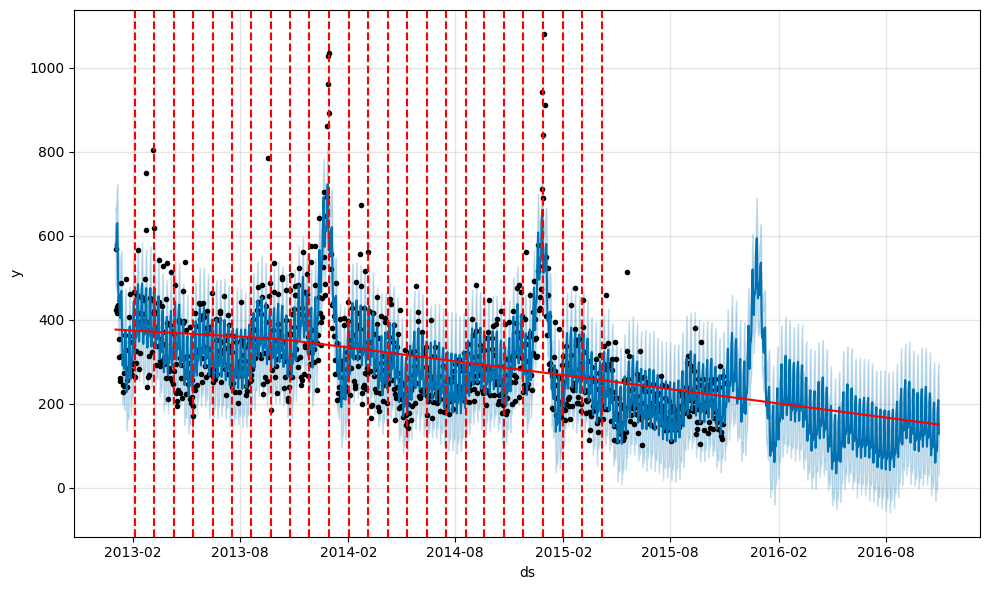

In [43]:
# for illustration purposes only, threshold = 0
from prophet.plot import add_changepoints_to_plot

fig = model_31.plot(forecast_31)
a = add_changepoints_to_plot(
    ax = fig.gca(), # plot
    m = model_31, # model
    fcst = forecast_31,
    threshold = 0) # hasil forecast

Dari 25 changepoints prophet akan menghitung besarnya tingkat perubahan pada slope dan akan menentukan mana yang paling signifikan. 

🔻 Model ini mendeteksi 3 changepoints yang signifikan

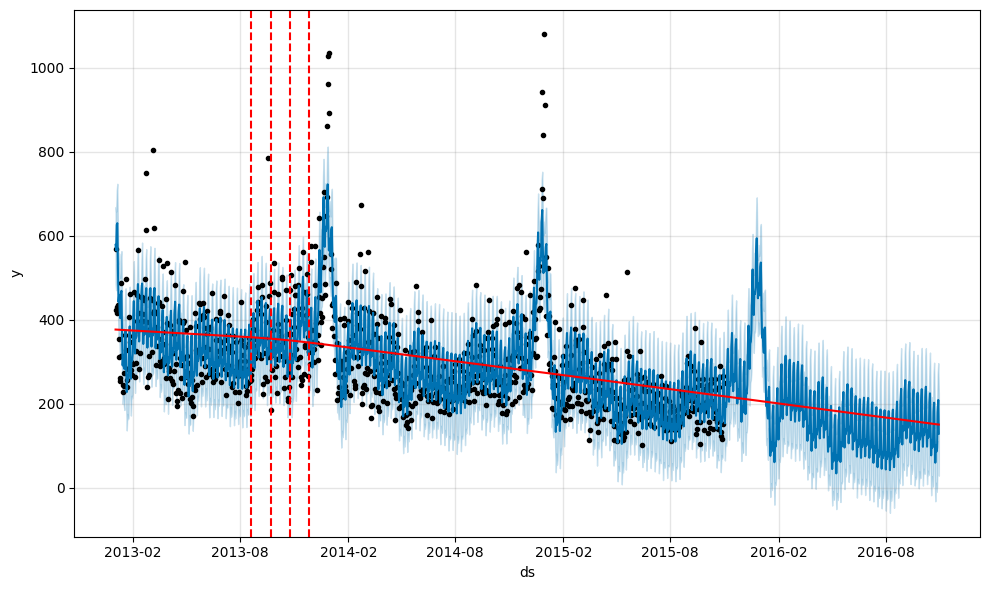

In [44]:
fig = model_31.plot(forecast_31)
a = add_changepoints_to_plot(fig.gca(), model_31, forecast_31)

#### Adjusting Trend Flexibility

Jika trend dirasa terlalu fleksibel - lebih sensitif terhadap perubahan (overfit) atau kaku - tidak sensitif terhadap perubahan (underfit), Prophet menyediakan hyperparameter untuk merubah fleksibilatas dari trend, yaitu:

💬 **Parameter yang direkomendasikan untuk ditune**

- `changepoint_prior_scale` (default = 0.05): Fleksibilitas dari trend. Semakin besar nilainya, maka trend akan semakin fleksibel, begitupun pula sebaliknya Rekomendasi: range[0.001, 0.5]

1️⃣ Fitting Model

❗️Mengatur parameter `changepoint_prior_scale = 0.5` akan membuat trend lebih fleksibel dalam mendeteksi titik perubahan trend. Membantu menangkap pola yang lebih kompleks dalam data, namun juga meningkatkan resiko overfitting

In [45]:
# membuat object trend tuning
model_tuning_trend = Prophet(changepoint_prior_scale = 0.5)

# fitting model
model_tuning_trend.fit(daily_total_qty)

18:41:00 - cmdstanpy - INFO - Chain [1] start processing
18:41:02 - cmdstanpy - INFO - Chain [1] done processing


2️⃣ Forecasting

In [46]:
# forecasting
# periode forecast
future = model_tuning_trend.make_future_dataframe(periods = 365, freq = 'D')
# predict
forecast_trend_tuning = model_tuning_trend.predict(future)

3️⃣ Visualization

c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


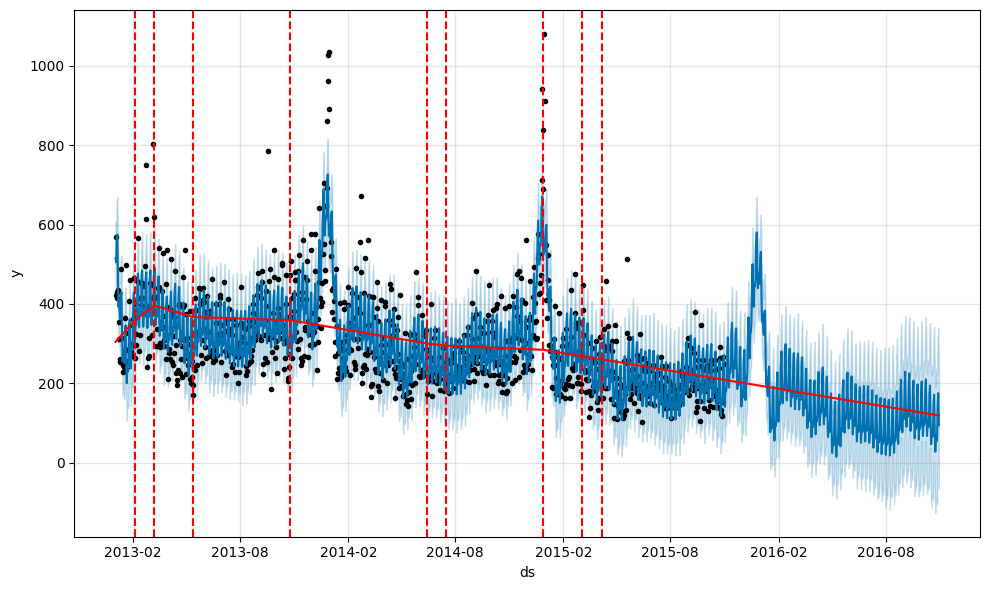

In [47]:
# visualize
fig = model_tuning_trend.plot(forecast_trend_tuning)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast_trend_tuning)

📈 Dengan melihat visualisasi tersebut kita mendapatkan:

**Bagaimana pengaruh pada hasil visualisasi?**
> Semakin besar nilai changepoint_prior_scale -> lebih **sensitif** dalam melihat pola perubahan trend. Semakin banyak changepoint perubahannya


Checkpoint untuk Trend component:
- Trend adalah pergerakan jangka panjang ✅
- Di prophet, trend dihitung menggunakan linear regresi ✅
- Kelebihan prophet -> changepoint -> default = 25 titik untuk melihat perubahan pada trend ✅
- 1 parameter yang dituning untuk trend (changepoint_prior_scale = 0.5) -> semakin besar semakin sensitif✅

### Seasonality Component

Selanjutnya kita akan membahas komponen time series lain yaitu seasonal. Seasonality adalah pola berulang untuk periode waktu tertentu. Seperti pola berulang untuk periode mingguan, bulanan atau tahunan. Berikut kita tinjau kembali plot masing-masing komponen pada data di toko 31.

c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

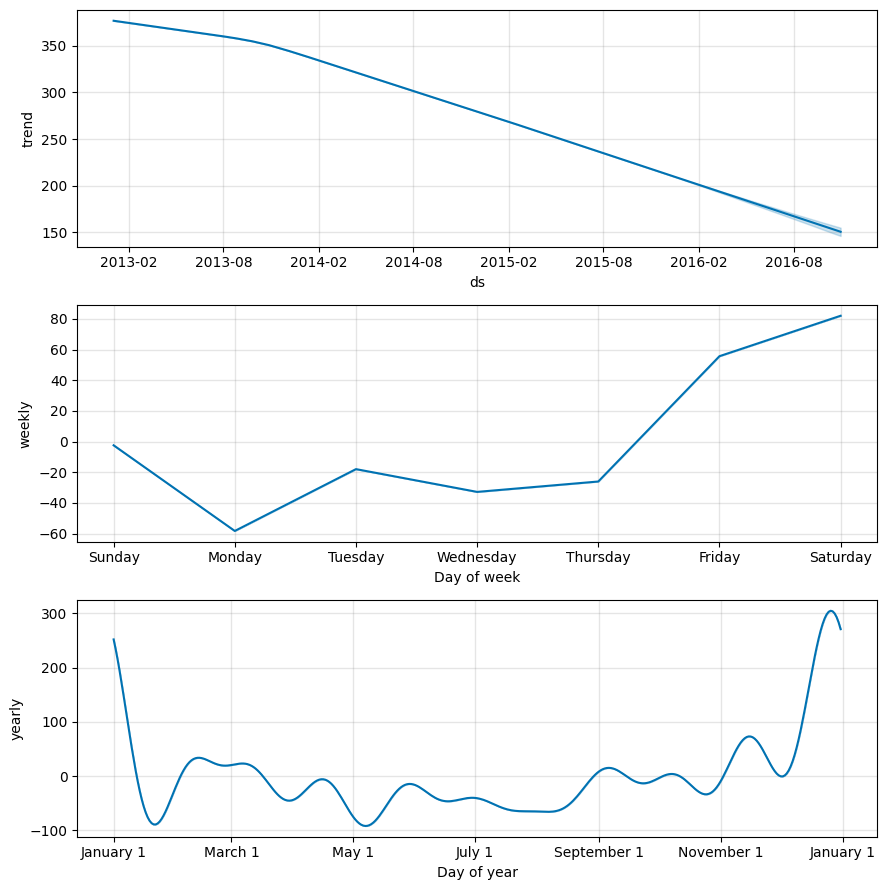

In [48]:
# lihat kembali plot komponen
fig = model_31.plot_components(forecast_31)

<div class="alert alert-success">
Kelebihan Prophet secara default, akan menentukan kondisi seasonal berdasarkan periodikal data yang disediakan. Serta kemudahan membentuk <b>multiple seasonality</b>
</div> 

Pada kasus kita, data tersusun dari Januari 2013 sampai akhir 2015 Quarter 3.

- Setiap data dengan periode harian akan memiliki **weekly seasonality**.
- Jika terdapat data > 2 tahun observasi harian, model akan memiliki **yearly seasonality**.
- Terdapat komponen seasonal lain, yaitu **daily seasonality** yang berusaha mencari pola tiap jam dalam 1 hari. Karena data kita tidak memiliki informasi jam, maka model kita tidak memiliki daily seasonality.

#### Fourier Order

Prophet menggunakan deret Fourier untuk memperkirakan efek seasonal.

💡 Fourier Order adalah parameter yang menentukan seberapa fluktuatif seasonality kita. Dengan meningkatkan order, kita dapat membuat seasonality yang dihasilkan menjadi lebih fleksibel (dan mungkin menyebabkan model menjadi overfit), begitu pula sebaliknya.

Berikut gambaran interaktif tentang Fourier: http://www.jezzamon.com/fourier/

![](assets/fourier.svg)

Default Fourier Order pada Seasonality Prophet:
- `weekly_seasonality = 3`
- `yearly_seasonality = 10`

[Reference Fourier Order](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#fourier-order-for-seasonalities)

In [49]:
# create object
model_tuning_seasonality = Prophet(
    weekly_seasonality = 3, # default 3
    yearly_seasonality = 100) # defaultnya 10, kita tuning jadi 100

In [50]:
# model fitting
model_tuning_seasonality.fit(daily_total_qty)

18:41:09 - cmdstanpy - INFO - Chain [1] start processing
18:41:10 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
# forecasting
## make future dataset
future = model_tuning_seasonality.make_future_dataframe(periods=365, freq='D')
## predict
forecast = model_tuning_seasonality.predict(future)

c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

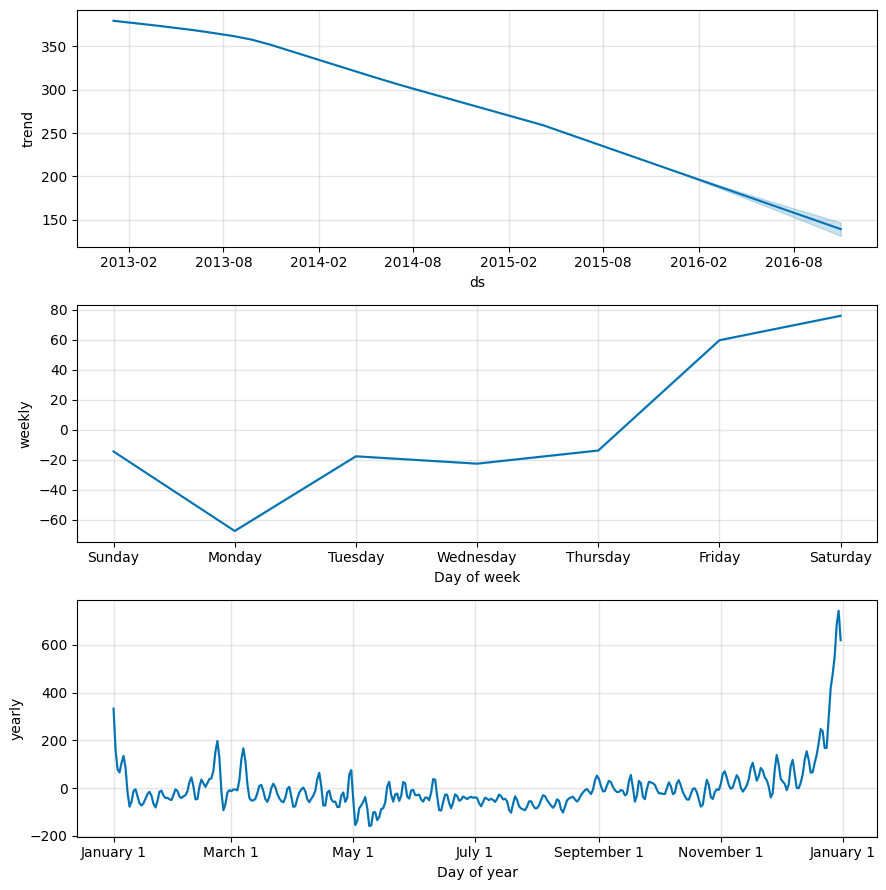

In [52]:
# visualize
fig = model_tuning_seasonality.plot_components(forecast)

📈 Dengan melihat visualisasi tersebut kita mendapatkan:

**Bagaimana pengaruh pada hasil visualisasi?**
> 1. Semakin kecil order fourier -> gelombang lebar / besar, 
> 2. Semakin besar order fourier -> gelombang rapat / kecil


--- END OF DAY 2 ---

---

--- START OF DAY 3 ---

#### Custom Seasonality

❓ Sebagai seorang data analyst, anda menemukan suatu kasus bisnis seperti berikut:
> Penjualan di bisnis Anda sangat dipengaruhi oleh tanggal bulanan. Kebanyakan dari pembeli cenderung membeli barang berdasarkan waktu pembayaran gaji mereka. Karena hal ini tidak ditangkap pada kondisi seasonal weekly dan yearly, kita perlu mendefinisikan seasonal custom. 

Custom seasonality dapat dilakukan dengan cara:

- **Menambahkan seasonality tambahan** dapat menggunakan method `.add_seasonality()` setelah membuat object Prophet dan sebelum melakukan fitting.

  Pada fungsi `.add_seasonality()`, terdapat 3 parameter yang dapat kita gunakan, yaitu:
  - `name`: Nama seasonality
  - `period`: Pola seasonal yang ingin dianalisa
  - `fourier_order`: Sebarapa cepat seasonality berubah

- **Menghilangkan efek seasonal default** pada fungsi `Prophet()` jika dibutuhkan (contoh: `yearly_seasonality = False`).

Menentukan period:
- Cek bentuk data date kita (harian)
- Pola perulangan = dalam 1 bulan ada berapa hari = 28, 30, 31 -> 30.5

> - Data = Bulanan
> - Pola tahunan = 12

> - Data = harian
> - Pola quarter = 30*3 = 90

💡 Nilai Fourier order yang direkomendasikan berdasarkan seasonalnya:
- weekly seasonality = 3
- monthly seasonality = 5
- yearly seasonality = 10

**🔻 Task**

Buatlah monthly seasonality dan coba tiadakan efek yearly seasonality.
Sehingga formula yang dibentuk menjadi:

$yhat(t) = T(t) + S_{weekly}(t) + S_{monthly}(t)$

1️⃣ Menghapus yearly seasonality

In [61]:
# fitting model remove seasonality
model_custom_seasonality = Prophet()

2️⃣ Menambahkan Custom Seasonality

- Montly Seasonality
- `period = 30.5` (rata-rata jumlah hari dalam satu bulan)
- `fourier_order=5`
    > - biasanya [3,5] untuk model yang sederhana
    > - mengontrol seberapa kompleks model seasonality yang digunakan. Semakin tinggi semakin fleksibel modelnya (biasanya `fourier_order=10`
    

In [56]:
daily_total_qty.head()

,ds,y
0,2013-01-02,568.00
1,2013-01-03,423.00
2,2013-01-04,431.00
3,2013-01-05,415.00
4,2013-01-06,435.00


In [62]:
## add seasonality
model_custom_seasonality.add_seasonality(name = 'monthly',
                                         period = 30.5,
                                         fourier_order = 5)
# misalkan mau menambahkan lagi seasonal quarter
model_custom_seasonality.add_seasonality(name = 'quarterly',
                                         period = 90,
                                         fourier_order = 7)

## fitting model
model_custom_seasonality.fit(daily_total_qty)

19:34:36 - cmdstanpy - INFO - Chain [1] start processing
19:34:36 - cmdstanpy - INFO - Chain [1] done processing


3️⃣ Forecasting & visualization

c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

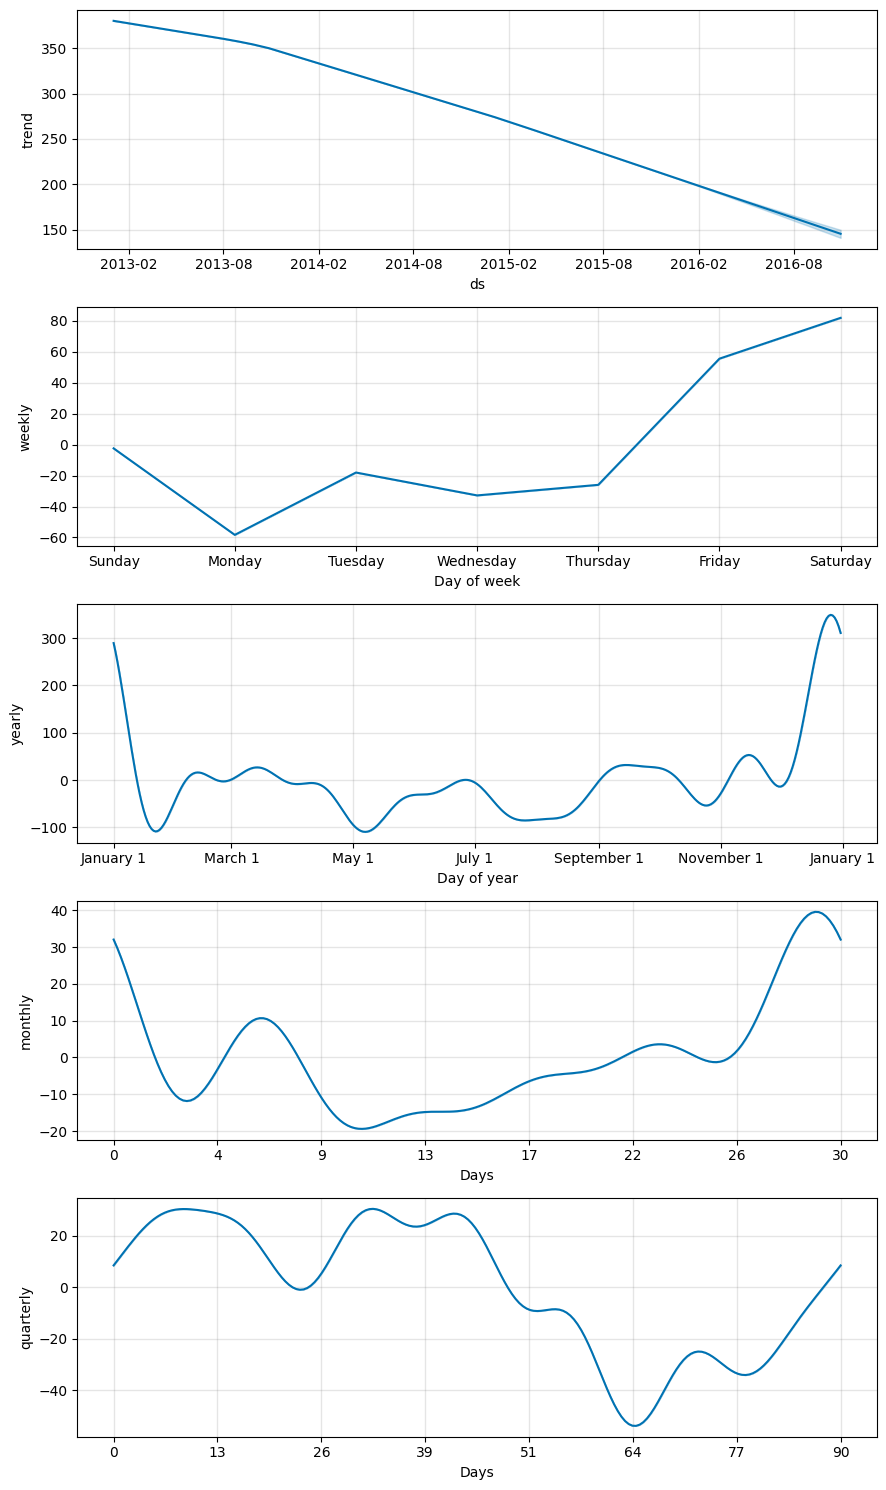

In [63]:
# forecasting
## make_future_dataframe
future = model_custom_seasonality.make_future_dataframe(periods = 365, freq = "D")

## predict
forecast_custom_season = model_custom_seasonality.predict(future)

# visualize
fig = model_custom_seasonality.plot_components(forecast_custom_season)

📈 Dengan melihat visualisasi tersebut kita mendapatkan:

**Bagaimana pengaruh pada hasil visualisasi?**
> Orang banyak belanja di akhir bulan, Paling sedikit di pertengahan bulan (10-11)

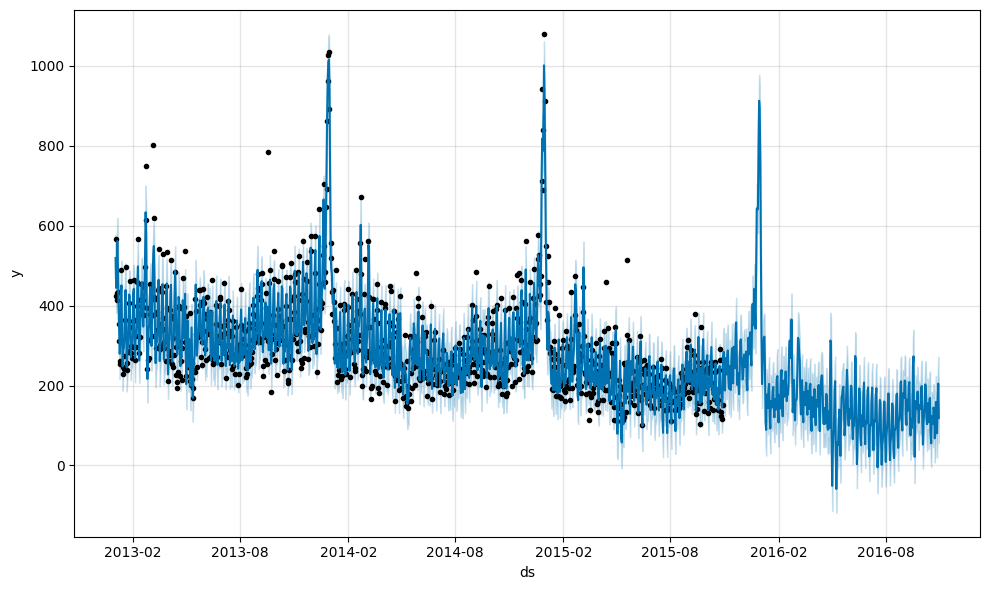

In [65]:
model_custom_seasonality.plot(forecast);

Checkpoint:
- Custom seasonality -> Menjadi kelebihan prophet -> Tunable 
- Method `.add_seasonality()`
    + `name` = nama seasonal -> bebas
    + `period` = periode seasonal
    + `fourier_order` = disesuaikan. Referensi prophet: weekly = 3, yearly = 10

### Holiday Effects

Prophet dapat memperhitungkan *holiday effect* ke dalam model time series. *Holiday effect* adalah kejadian tidak biasa yang mungkin berdampak signifikan pada rangkaian waktu, seperti **hari libur nasional** atau **promosi penjualan**.

Berbeda dengan seasonality yang dapat terdeteksi secara otomatis, *holiday effect* perlu **ditentukan secara manual** oleh pengguna. Dengan memasukkan *holiday effect* ke dalam model, Prophet dapat menangkap dampak peristiwa penting ini dan memberikan forecast yang lebih baik.

🔻 Sekarang kita akan melihat data kita dari model pertama yang kita buat. Dari visualisasi kita dapat melihat adanya penjualan yang signifikan di setiap akhir tahun (mencapai lebih dari 800 penjualan per hari).

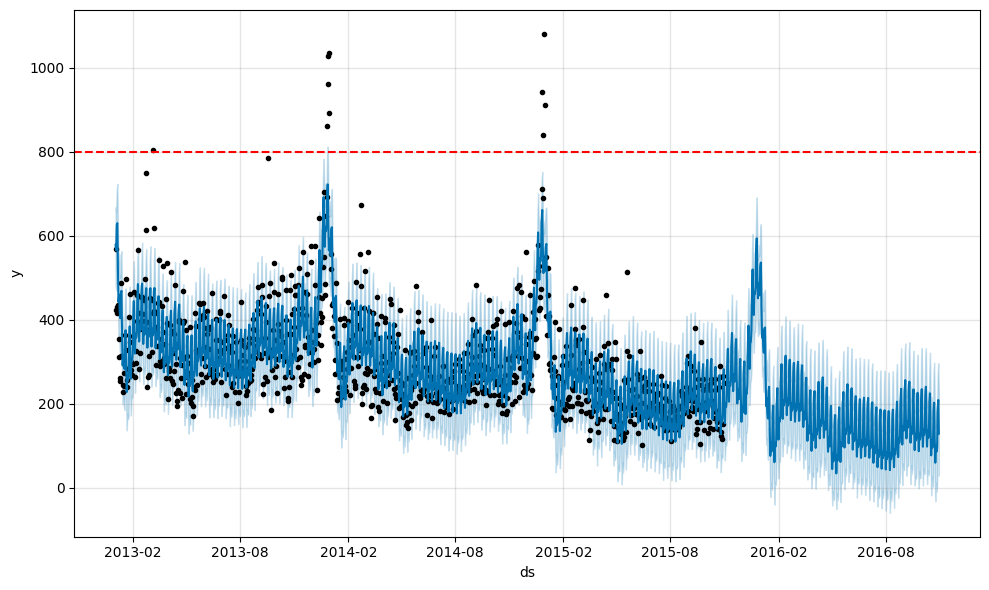

In [66]:
# for illustration purposes only
fig = model_31.plot(forecast_31)
plt.axhline(y=800, color='red', ls='--')
plt.show()

Mari kita lihat penjualan dengan jumlah di atas 800 menggunakan conditional subsetting.

In [67]:
# conditional subseting y > 800 dari data daily_total_qty
daily_total_qty[daily_total_qty['y'] > 800]

,ds,y
64,2013-03-07,803.00
359,2013-12-27,861.00
360,2013-12-28,"1,028.00"
361,2013-12-29,962.00
362,2013-12-30,"1,035.00"
363,2013-12-31,891.00
723,2014-12-27,942.00
725,2014-12-29,839.00
726,2014-12-30,"1,080.00"
727,2014-12-31,912.00


Ternyata penjualan yang sangat tinggi terjadi antara tanggal **27-31 Desember** pada 2 tahun data kita. Dengan ini kita dapat mengasumsikan adanya fenomena tahun baru yaitu saat dimana orang-orang menggunakan bonus akhir tahun mereka untuk berbelanja.

Dari sini kita dapat mempersiapkan sebuah dataframe baru yang memiliki informasi data holiday yang akan kita atur.

Kolom-kolom yang harus dipersiapkan yaitu:
- `holiday` : nama hari libur yang nilainya unik
- `ds` : informasi waktu
- `lower_window` : jumlah periode waktu **sebelum** tanggal hari libur yang diasumsikan memiliki pengaruh (<=0)
- `upper_window` : jumlah periode waktu **setelah** tanggal hari libur yang diasumsikan memiliki pengaruh (>=0)

⚠️ Informasi ini harus mencakup seluruh kejadian yang akan kita gunakan, baik pada model fitting maupun forecast (mundur sejauh historikal data kita, dan maju sejauh kita ingin melakukan prediksi)

In [68]:
new_year = pd.DataFrame({
    'holiday' : 'new_year',
    'ds' : pd.to_datetime(['2013-12-31', '2014-12-31', # tanggal historikal
                           '2015-12-31']), # future date
    'lower_window' : -4, # terhitung 27-30 des
    'upper_window' : 0
})
new_year

,holiday,ds,lower_window,upper_window
0,new_year,2013-12-31,-4,0
1,new_year,2014-12-31,-4,0
2,new_year,2015-12-31,-4,0


In [69]:
new_year = pd.DataFrame({
    'holiday' : 'new_year',
    'ds' : pd.to_datetime(['2013-12-27', '2014-12-27', # tanggal historikal
                           '2015-12-27']), # future date
    'lower_window' : 0, # terhitung 27-30 des
    'upper_window' : 4
})
new_year

,holiday,ds,lower_window,upper_window
0,new_year,2013-12-27,0,4
1,new_year,2014-12-27,0,4
2,new_year,2015-12-27,0,4


**Pertanyaan pak Anugra: Menambahkan hari libur yang dinamis**

Cara 1 

In [73]:
ramadhan_lebaran = pd.DataFrame({
    'holiday' : 'ramadhan_lebaran',
    'ds' : pd.to_datetime(['2020-05-23', '2021-05-12', # tanggal historikal
                           '2022-05-01']), # future date
    'lower_window' : -30, # terhitung 27-30 des
    'upper_window' : 7
})
ramadhan_lebaran

,holiday,ds,lower_window,upper_window
0,ramadhan_lebaran,2020-05-23,-30,7
1,ramadhan_lebaran,2021-05-12,-30,7
2,ramadhan_lebaran,2022-05-01,-30,7


Cara 2: https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#fourier-order-for-seasonalities

In [78]:
# Python
from prophet.make_holidays import make_holidays_df

indo_holidays = make_holidays_df(
    year_list=[2020 + i for i in range(5)], # mau berapa tahun dikeluarkan datanya
    country='ID' # identitas negara
)
indo_holidays.tail(10)

,ds,holiday
71,2024-05-09,Ascension Day
72,2024-06-01,Pancasila Day
73,2024-08-17,Independence Day
74,2024-12-25,Christmas Day
75,2024-04-10,Eid al-Fitr
76,2024-04-11,Eid al-Fitr Second Day
77,2024-06-16,Eid al-Adha (estimated)
78,2024-07-07,Islamic New Year (estimated)
79,2024-09-15,Prophet's Birthday (estimated)
80,2024-02-08,Isra and Miraj (estimated)


Setelah dataframe `hari_libur` dipersiapkan, kita perlu memasukkan informasi ini ke dalam `Prophet()` di parameter `holidays`.

20:16:01 - cmdstanpy - INFO - Chain [1] start processing
20:16:01 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprec

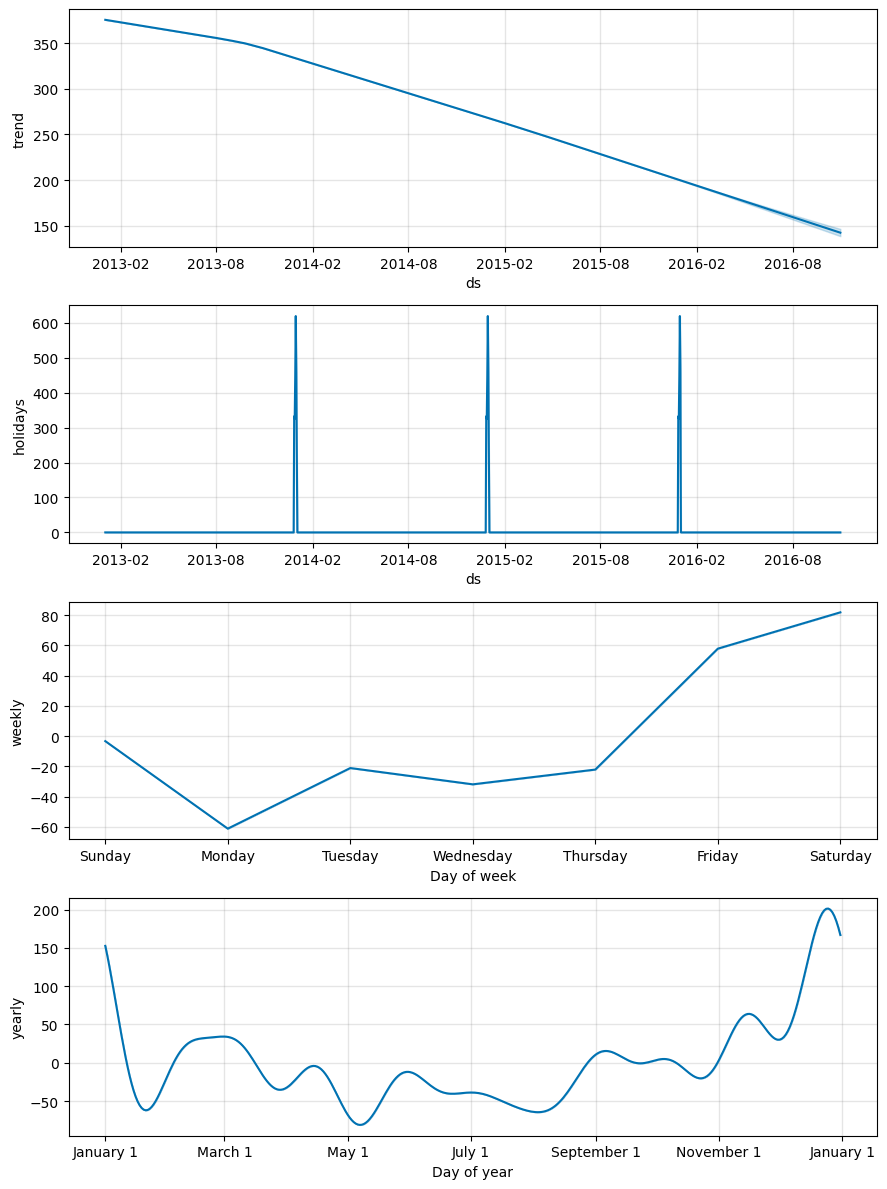

In [71]:
# model kosong
model_holiday = Prophet(holidays=new_year)

# model fitting
model_holiday.fit(daily_total_qty)

# forecasting
future = model_holiday.make_future_dataframe(periods = 365, freq = "D")
forecast = model_holiday.predict(future)

# visualize
fig = model_holiday.plot_components(forecast)

Dengan adanya informasi hari libur akhir tahun, terlihat bahwa model yang dihasilkan lebih baik menangkap pola di akhir tahun dibandingkan hanya menggunakan efek yearly seasonality. Jika kita plot komponennya, kita dapat melihat adanya efek komponen holiday yang terlampir:

In [ ]:
fig = model_holiday.plot_components(forecast)

# Time Series Workflow 

![workflow](assets/prophet-workflow.jpg)

## Implemented - Time Series Workflow

### Data Preparation

Yang perlu diingat, Model Prophet mewajibkan membuat data ke dalam 2 kolom (**ds** dan **y**)

[Link to section](#Data-Preparation)

In [79]:
daily_total_qty.head()

,ds,y
0,2013-01-02,568.00
1,2013-01-03,423.00
2,2013-01-04,431.00
3,2013-01-05,415.00
4,2013-01-06,435.00


### Time Series Cross Validation

Seperti di kasus klasifikasi/regresi dimana dilakukan evaluasi untuk mengetahui sebaik apa performa model yang telah dibangun. Pada model time series, terdapat juga tahapan evaluasi model dimana kita akan membagi data kita menjadi **data train** dan **data test**

💬 Evaluasi model forecasting dengan metode splitting melibatkan pembagian data menjadi dua bagian:
> - **Data Latih (Train Data)**: Digunakan untuk melatih model time series untuk mengidentifikasi pola-pola dasar seperti tren dan seasonal
> - **Data Uji (Test Data)**: berfungsi sebagai **unseen data** untuk melihat performa model

Konsep CV untuk model TS akan sama dengan model klasifikasi maupun model regresi, dimana *data trainnya akan lebih banyak di bandingkan data test*. Akan tetapi terdapat satu kriteria lainnya yang harus dipenuhi yaitu, 
- **Data Train** akan menggunakan **data awal** 
- **Data Test** akan menggunakan **data akhir**

![](assets/cv.png)

Mari kita lihat kembali range data kita

In [80]:
daily_total_qty['ds'].describe()

count                             1031
mean     2014-06-01 22:34:48.069835008
min                2013-01-02 00:00:00
25%                2013-09-16 12:00:00
50%                2014-06-02 00:00:00
75%                2015-02-15 12:00:00
max                2015-10-31 00:00:00
Name: ds, dtype: object

Pada data ini, kita memiliki range waktu dari Januari 2013 sampai Q3 tahun 2015. Misalkan kita ingin menggunakan data di tahun 2015 sebagai test data, sisanya untuk train data. Kita dapat memisahkan data kita dengan conditional subseting:

In [81]:
# conditional subseting
train = daily_total_qty[daily_total_qty['ds'] < '2015-01-01']
test = daily_total_qty[daily_total_qty['ds'] >= '2015-01-01']

print(f'Train size: {train.shape}')
print(f'Test size: {test.shape}')

Train size: (728, 2)
Test size: (303, 2)


<div class="alert alert-danger">
Sekarang mari kita latih model kita menggunakan data tahun 2013-2014 dan forecast untuk tahun 2015 (<b>303 hari</b>).

<hr>

🔻 **Task**

Buat model dengan spesifikasi berikut!
- Atur `holidays` = dataframe holiday yang sudah dibuat
- `yearly_seasonality` = True
- tambahkan seasonality = `monthly` dengan `period = 30.5` dan `fourier_order = 5`
</div> 

### Fitting Model 

In [90]:
# add holiday & yearly seasonality
model_final = Prophet(yearly_seasonality=True,
                      holidays = new_year)

# add seasonality monthly
model_final.add_seasonality(name = 'monthly',
                            period = 30.5,
                            fourier_order = 5)

📍 Fitting model hanya untuk **train** data

In [91]:
# fitting model
model_final.fit(train)

21:04:18 - cmdstanpy - INFO - Chain [1] start processing
21:04:18 - cmdstanpy - INFO - Chain [1] done processing


### Forecast Model

📍 Banyaknya periode forecast = sebanyak data test

In [92]:
future_final = model_final.make_future_dataframe(periods= 303, freq = 'D') # sebanyak data test
forecast_final = model_final.predict(future_final)
forecast_final.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1026,2015-10-26,213.85,61.71,227.47,200.44,227.28,-71.47,-71.47,-71.47,0.00,...,-70.04,-70.04,-70.04,-13.24,-13.24,-13.24,0.00,0.00,0.00,142.38
1027,2015-10-27,213.68,107.25,266.31,200.20,227.17,-25.73,-25.73,-25.73,0.00,...,-26.94,-26.94,-26.94,-11.76,-11.76,-11.76,0.00,0.00,0.00,187.95
1028,2015-10-28,213.50,102.90,253.65,199.97,227.05,-34.31,-34.31,-34.31,0.00,...,-37.60,-37.60,-37.60,-9.69,-9.69,-9.69,0.00,0.00,0.00,179.18
1029,2015-10-29,213.32,116.31,279.65,199.73,226.94,-15.96,-15.96,-15.96,0.00,...,-23.47,-23.47,-23.47,-7.02,-7.02,-7.02,0.00,0.00,0.00,197.36
1030,2015-10-30,213.14,214.61,367.49,199.49,226.82,78.37,78.37,78.37,0.00,...,63.90,63.90,63.90,-3.78,-3.78,-3.78,0.00,0.00,0.00,291.51


In [87]:
forecast_final.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,360.79,384.22,537.66,360.79,360.79,100.48,100.48,100.48,0.00,...,-37.60,-37.60,-37.60,143.08,143.08,143.08,0.00,0.00,0.00,461.27
1,2013-01-03,360.94,393.67,555.14,360.94,360.94,111.41,111.41,111.41,0.00,...,-23.47,-23.47,-23.47,128.26,128.26,128.26,0.00,0.00,0.00,472.35
2,2013-01-04,361.09,475.01,630.66,361.09,361.09,192.77,192.77,192.77,0.00,...,63.90,63.90,63.90,112.57,112.57,112.57,0.00,0.00,0.00,553.87
3,2013-01-05,361.24,495.97,644.66,361.24,361.24,207.56,207.56,207.56,0.00,...,95.40,95.40,95.40,96.24,96.24,96.24,0.00,0.00,0.00,568.80
4,2013-01-06,361.40,366.02,524.83,361.40,361.40,82.88,82.88,82.88,0.00,...,-1.25,-1.25,-1.25,79.54,79.54,79.54,0.00,0.00,0.00,444.27


### Model Interpretation - Visualize

c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


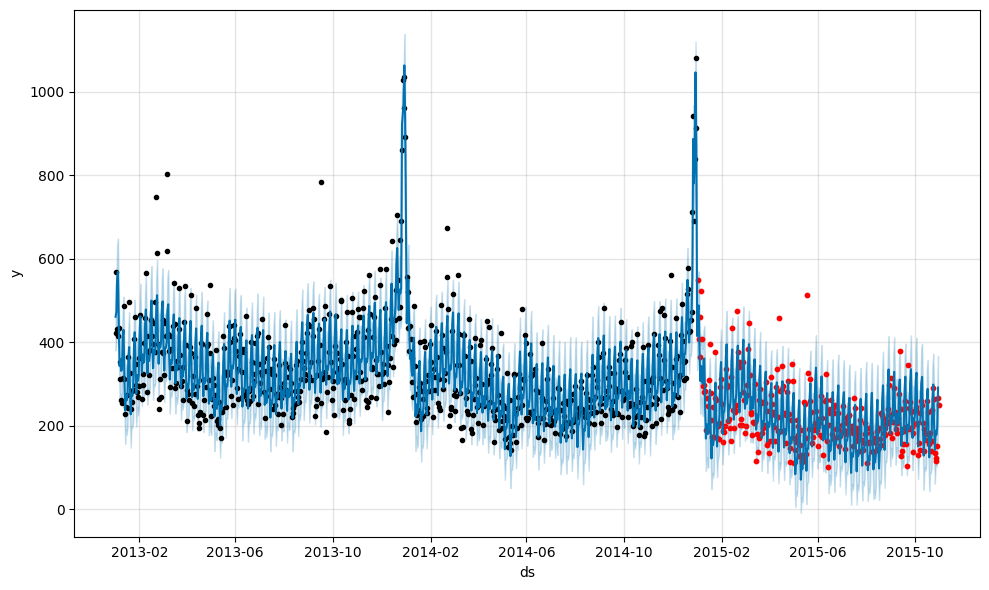

In [93]:
# visualize
fig = model_final.plot(forecast_final)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.show()

## 7. Evaluation Metrics

Berdasarkan plot di atas model kita mampu untuk meramalkan kondisi di masa depan secara general, tetapi pada beberapa bagian masih berbeda antara data asli dengan data prediksi. **Perbedaan antara nilai asli dengan prediksi** disebut dengan **error** dan kita harus menghitung nilainya untuk mendapatkan kesimpulan evaluasi model. Berikut ini adalah beberapa metrics yang dapat digunakan:

- Mean Absolute Error (MAE)

    Rata-rata seberapa menyimpang hasil *forecast* terhadap data aktual.

$$
MAE = \frac{\sum_{i=1}^{n}\left | y_{pred, i} - y_{real, i} \right |}{n}
$$

> 🔎 **Interpretasi MAE**: MAE mengukur kesalahan rata-rata dalam satuan yang sama dengan data aktual. Misalnya, jika MAE adalah 10, ini berarti prediksi rata-rata selisih sebesar 10 unit dari data aktual.

- Mean Precentage Absolute Error

    Sama seperti MAE, namun dalam bentuk persentase, sehingga lebih mudah diinterpretasikan, namun tidak dapat digunakan ketika ada nilai 0 pada data kita
$$
MAPE = \frac{1}{n}\Sigma{\frac{| y-\hat y|}{y}} \times 100\%
$$  

> 🔎 **Interpretasi MAPE**:MAPE mengukur kesalahan rata-rata dalam bentuk persentase dari data aktual. Misalnya, jika MAPE adalah 5%, ini berarti prediksi rata-rata memiliki kesalahan sebesar 5% dari data aktual.


Pada course ini kita akan menggunakan MAPE karena paling mudah diinterpretasikan, dengan catatan tidak ada nilai 0 pada data kita.

Untuk menghitung MAPE kita dapat mengugnakan fungsi `mean_absolute_percentage_error` dari `scikit-learn`.

💡 Nilai aktual adalah `y` pada data awal dan nilai prediksi adalah `yhat` pada data forecast

In [94]:
from sklearn.metrics import mean_absolute_percentage_error

# hasil prediksi train
forecast_train = forecast_final[forecast_final['ds'] < '2015-01-01']

# nilai MAPE train
train_mape = mean_absolute_percentage_error(y_true = train['y'],
                                            y_pred = forecast_train['yhat'])
train_mape                                           

0.13987080574876798

In [89]:
# hasil prediksi test
forecast_test = forecast_final[forecast_final['ds'] >= '2015-01-01']

# nilai MAPE test
test_mape = mean_absolute_percentage_error(y_true = test['y'],
                                           y_pred = forecast_test['yhat'])
test_mape

0.29678214528583885

- Bisa menilai apakah model sudah baik atau belum?
- Ada atau tidaknya overfiting -> Train nilainya jauh lebih baik dibandingkan data test

## 8. Tuning Model - Hyperparameter Tuning <a id="6" ></a>

*Hyperparameter tuning* adalah langkah penting dalam membangun model machine learning untuk mencapai performa terbaik.

🎯 **Tujuan**: 
> Menemukan **kombinasi hyperparameter terbaik** yang **meminimalkan error**

💬 **Metode Hyperpatameter Tuning**
> - Menggunakan **Algoritma Grid Search**: metode *brute-force* yang membangun model untuk setiap kombinasi hyperparameter yang ditentukan dan kemudian mengevaluasinya.
> - Metode ini bisa memakan waktu dan sumber daya komputasi, tetapi metode ini menjamin menemukan hyperparameter optimal yang sesuai dengan rentang nilai yang ditentukan.

💬 **Langkah-langkah menggunakan Algoritma Grid Search untuk mencari hyperparameter terbaik**
> 1.  Menentukan nilai-nilai dari hyperparameter yang ingin dicoba
> 2.  Melakukan iterasi pembuatan model dan menghitung nilai MAPE-nya menggunakan *for-loop*
> 3.  Mendapatkan kombinasi hyperparameter optimal yang memiliki MAPE terkecil

💬 **Referensi**
> - Silakan buka [link ini](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning) untuk melihat rekomendasi hyperparameter yang dapat di-tuning pada model Prophet.<br>

🔻 Sebagai seorang data analyst, kita akan mencoba beberapa kemungkinan hyperparameter. Beberapa diantaranya yaitu:
- `changepoint_prior_scale` (range 0.001 - 0.5): mengatur trend, semakin besar semakin fluktuatif 

1️⃣ Tentukan hyperparameter dan masukkan beberapa nilai didalamnya. Serta buat variabel untuk mengisi kombinasi hyperparameter dan nilai MAPE

In [95]:
from sklearn.model_selection import ParameterGrid

# Grid search parameters -> dictionary
param_grid = {
    'changepoint_prior_scale' : [0.005, 0.01, 0.05, 0.5], # tuning trend
    'yearly_seasonality' : [10,20] # tuning seasonality
}

# generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))
all_params

[{'changepoint_prior_scale': 0.005, 'yearly_seasonality': 10},
 {'changepoint_prior_scale': 0.005, 'yearly_seasonality': 20},
 {'changepoint_prior_scale': 0.01, 'yearly_seasonality': 10},
 {'changepoint_prior_scale': 0.01, 'yearly_seasonality': 20},
 {'changepoint_prior_scale': 0.05, 'yearly_seasonality': 10},
 {'changepoint_prior_scale': 0.05, 'yearly_seasonality': 20},
 {'changepoint_prior_scale': 0.5, 'yearly_seasonality': 10},
 {'changepoint_prior_scale': 0.5, 'yearly_seasonality': 20}]

2️⃣ Melakukan iterasi dengan memasukkan kedalam pembuatan model Prophet - Fitting Model - Evaluasi

In [96]:
mape = [] # store the result for each params here

# iterate each parameter
for parameter in all_params:
    # print parameter
    print(parameter)
    # hyperparameter tuning
    model = Prophet(
        changepoint_prior_scale = parameter['changepoint_prior_scale'],
        yearly_seasonality= parameter['yearly_seasonality'],
        holidays = new_year
    )

    # train model with data train
    model.fit(train)

    # forecasting
    future = model.make_future_dataframe(periods=303, freq='D') # 303 days (test size)
    forecast = model.predict(future)
    
    # Evaluation metrics: MAPE
    forecast_test = forecast[forecast['ds'] >= '2015-01-01']
    test_mape = mean_absolute_percentage_error(y_true=test['y'],
                                               y_pred=forecast_test['yhat'])
    
    mape.append(round(test_mape, 2))

{'changepoint_prior_scale': 0.005, 'yearly_seasonality': 10}


21:14:58 - cmdstanpy - INFO - Chain [1] start processing
21:14:58 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.005, 'yearly_seasonality': 20}


21:15:02 - cmdstanpy - INFO - Chain [1] start processing
21:15:03 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'yearly_seasonality': 10}


21:15:08 - cmdstanpy - INFO - Chain [1] start processing
21:15:09 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'yearly_seasonality': 20}


21:15:14 - cmdstanpy - INFO - Chain [1] start processing
21:15:15 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.05, 'yearly_seasonality': 10}


21:15:21 - cmdstanpy - INFO - Chain [1] start processing
21:15:22 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.05, 'yearly_seasonality': 20}


21:15:26 - cmdstanpy - INFO - Chain [1] start processing
21:15:27 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'yearly_seasonality': 10}


21:15:30 - cmdstanpy - INFO - Chain [1] start processing
21:15:31 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'yearly_seasonality': 20}


21:15:33 - cmdstanpy - INFO - Chain [1] start processing
21:15:34 - cmdstanpy - INFO - Chain [1] done processing


🔻 Dari variabel `all_params` dan `mape` kita dapat menyusun dataframe yang menyimpan kedua informasinya lalu mengurutkannya dari yang errornya paling kecil.

In [97]:
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mape

tuning_results.sort_values(by = 'mape')

,changepoint_prior_scale,yearly_seasonality,mape
2,0.01,10,0.29
4,0.05,10,0.29
0,0.01,10,0.30
1,0.01,20,0.30
3,0.01,20,0.30
5,0.05,20,0.30
7,0.50,20,0.32
6,0.50,10,0.37


3️⃣ Dengan informasi parameter terbaik ini, kita lakukan kembali fitting model yang akan digunakan untuk forecasting.

In [98]:
import numpy as np

# mengambil hyperparameter dengan mape terendah
best_params = all_params[np.argmin(mape)]
best_params

{'changepoint_prior_scale': 0.01, 'yearly_seasonality': 10}

4️⃣ **Buat ulang model** -> Dengan informasi parameter terbaik ini, kita lakukan kembali fitting model yang akan digunakan untuk forecasting.

21:19:06 - cmdstanpy - INFO - Chain [1] start processing
21:19:07 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\miniconda3\envs\zeus_da\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


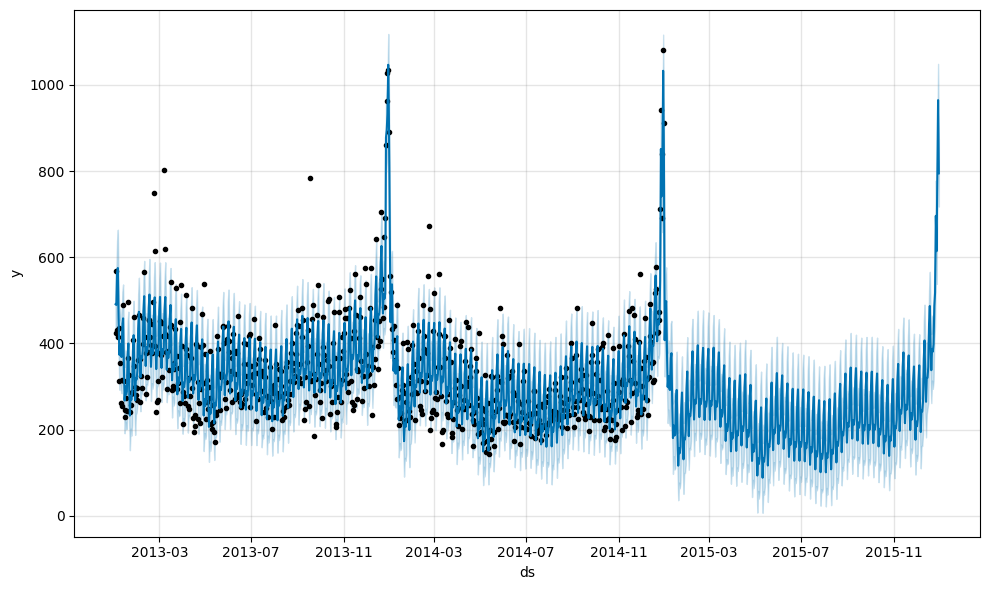

In [100]:
# model kosong
model_best = Prophet(**best_params, holidays= new_year)
# model fitting
model_best.fit(train)

# forecasting
future_best = model_best.make_future_dataframe(periods=365, freq='D') # forecasting untuk data yang baru
forecast_best = model_best.predict(future_best)

# visualize
fig = model_best.plot(forecast_best)

# References

- [Prophet Documentation](https://facebook.github.io/prophet/docs/quick_start.html)
- [Paper: Forecasting at Scale](https://peerj.com/preprints/3190/)
- [Prophet Hyperparameter Tuning](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning)
- [Algoritma: Time Series Forecasting using `prophet` in R](https://business-forecasting.netlify.app/#5_time_series_forecasting_using_prophet)
- [Algoritma: Time Series Forecasting using `prophet` in Python](https://github.com/tomytjandra/tsf-prophet)